# My Version

In [1]:
from keras.models import model_from_json
with open('model.json','r') as f:
    model = model_from_json(f.read())

Using TensorFlow backend.


In [2]:
model.load_weights('model.h5')

In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 128)       147584    
__________

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from math import sqrt,ceil

In [97]:
def pre(images=5,all=0,n_image_per_row=1):
    name=['Cat','Dog']
    lis = os.listdir('images')
    if(all==0):
        images = min(images,len(lis))
    else:
        images = len(lis)
    
    ans = []
    counter=0
    
    f, axs = plt.subplots(ceil(images/n_image_per_row),n_image_per_row,figsize=(12,12))
    
    
    for i in range(images):
        image = cv2.resize(cv2.imread('images/'+lis[i]),(128,128))/255.0
        ans.append(name[int(round(model.predict(np.array([image]))[0][0]))])
        if(n_image_per_row>1):
            a = counter//n_image_per_row
            b = counter%n_image_per_row
            axs[a][b].set_title(ans[-1])
            axs[a][b].imshow(image)
            axs[a][b].set_xticks([]) 
            axs[a][b].set_yticks([]) 
        else:
            axs[counter].set_title(ans[-1])
            axs[counter].imshow(image)
            axs[counter].set_xticks([]) 
            axs[counter].set_yticks([]) 
        counter+=1

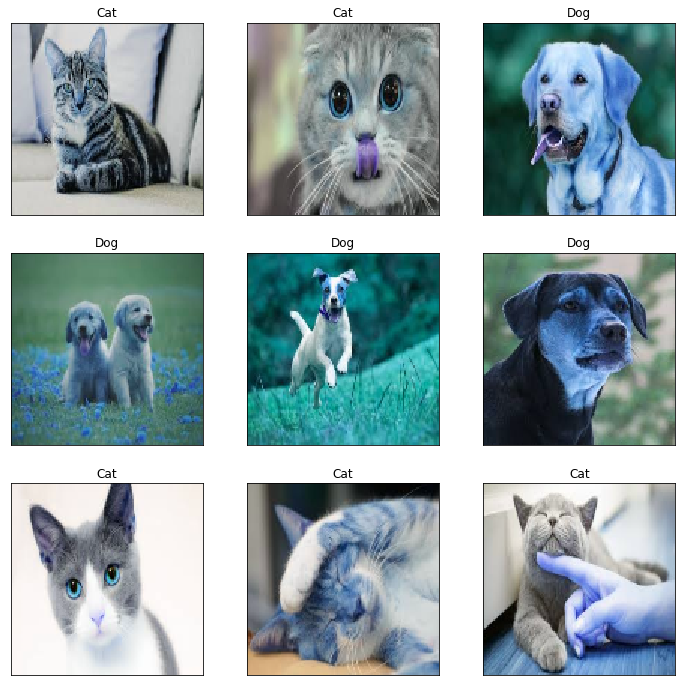

In [98]:
pre(all=1,n_image_per_row=3)